# CBE 60553, Fall 2017, Homework 7

Solve each problem on separate sheets of paper, and clearly indicate the problem number and your name on each. Carefully and neatly document your answers. You may use a mathematical solver like Python. Use plotting software for all plots.

## 1. It’s all a balance

The van der Waals equation of state captures the balance between molecular attractions and repulsions that characterize a real fluid. The Helmholtz free energy of a monatomic van der Waals fluid can be written 

\begin{equation*} a_\text{vdW} = \left \{ - RT ln (v-b) -1.5 R T ln (R T) \right\} +\left \{ RT -a/v \right \} \end{equation*} 

where the terms in the first bracket correspond to the entropic repulsive forces and the terms in the second bracket the energetic attractions.

1. Plot the repulsive, attractive, and total Helmholtz energies of $\text{CO}_2$ at $280 \text{ K}$ vs. log molar volume from $0.04$ to $\text{1 L mol}^{-1}$. The $\text{CO}_2$ van der Waals constants are $a = 3.6551 \text{ L}^2 \text{ bar mol}^{-2}$ and $b = 0.042816 \text{ L mol}^{-1}$.
2. Plot the compressibility of van der Waals $\text{CO}_{2}$ vs. reduced pressure $P_r$ of $0.1 < P_r < 10$ at $T_r =1.05$. The critical temperature of $\text{CO}_{2}$ is $T_c = 304.2{ K}$ and critical pressure $P_c = 7.376 \times 10^{6} \text{ Pa}$. Hint: You will have to solve a cubic numerically. Consider which of the three roots is the relevant one.
3. The compressibility of an ideal gas is $Z_\text{ig}=1$. Explain in terms of microscopic interactions why $Z$ is greater or less than 1 for the various values of $P_r$ in your Question 2 plot.

$ \textbf{soln)}$

$\text{1.}$ <br>
Total $a_\text{vdW} = \left \{ - RT ln (v-b) -1.5 R T ln (R T) \right\} +\left \{ RT -a/v \right \} $ <br>
Repulsive part: $a_\text{vdW_rep} = - RT ln (v-b) -1.5 R T ln (R T) $ <br>
Attractive part: $a_\text{vdW_att} = RT -a/v $ <br>

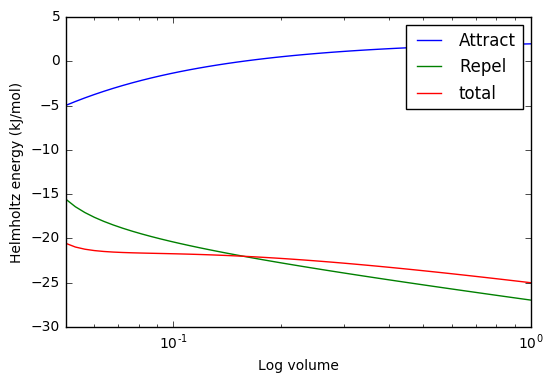

In [2]:
import numpy as np
import matplotlib.pyplot as plt

a = 3.6551 # (liter bar)/mol * (liter/mol)
a = a * 100 # (J/mol) * (liter/mol)
b = 0.042816 # liter/mol
R0 = 8.31441 # J / mol K

T = 280. # K
vmin=np.log10(0.05)
vmax=np.log10(1.)
v = np.logspace(vmin,vmax)

attract = (R0*T-a/v)/1000.
repel = -R0*T*(np.log(v-b) + 1.5 * np.log(R0*T))/1000.

plt.semilogx(v,attract,label='Attract') 
plt.semilogx(v,repel,label='Repel')
plt.semilogx(v,attract+repel,label='total')
plt.xlim([0.05,1])
plt.xlabel('Log volume')
plt.ylabel('Helmholtz energy (kJ/mol)')
legend=plt.legend()
plt.show()

$\text{2.}$ <br>
Solve $ P_{r} = \frac{8T_r}{3v_r - 1} - \frac{3}{v_r^2} $ to get $v_r$. <br>
At $T_r > 1$ there is only 1 real root.

$ Z = \frac{Pv}{RT} = \frac{v}{v-b} - \frac{a}{RTv} = \frac{v_r}{v_r - 1/3} - \frac{9}{8T_{r}v_{r}} $

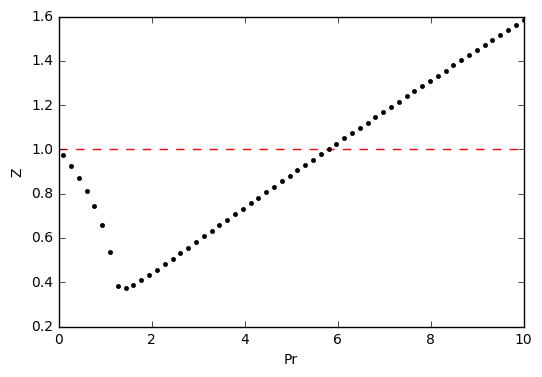

In [36]:
import numpy as np
from sympy.solvers import solve
from sympy import Symbol
import matplotlib.pyplot as plt

a = 3.6551 # L^(2) bar / mol^(2)
b = 0.042816 # L/mol
R0 = 8.31441 * 10**(-2) # L bar / mol K

Tc = 304.2 # K
Tr = 1.05
Pc = 7.376 * 10**(6) * 10**(-5) # bar
T = Tc * Tr

Z = []
Prs = np.linspace(0.1, 10, 60)
for Pr in Prs: # start 
    
    P = Pc * Pr

    v = Symbol('v')
    sol = solve((R0 * T) / (v - b) - a /(v**(2)) - P, v)

    v = sol[0]
    z = P * v / R0 / T
    
    Z.append(z)
    
plt.axhline(y=1, color='red',linestyle='--' )
plt.plot(Prs, Z, 'k.')
plt.xlabel('Pr')
plt.ylabel('Z')

plt.show()

$\text{3.}$ <br>
Z < 1 at low pressure, where the gas is dilute and attractive interactions make it unfavorable to expand relative to an ideal gas. Z > 1 at high pressures, where the volume of the gas makes it unfavorable to pack more closely because of loss of entropy.

## 2. We had to talk about it at some point

The fugacity $f(T,P)$ of a gas is defined as the function that satisfies

$$ \mu(T,P) = \mu^\circ(T) + RT \ln \left ( f(T,P)/ P^\circ) \right ) $$

where $\mu^{\circ}(T)$ is the chemical potential of the fluid in an ideal gas reference
state at reference pressure $P^{\circ}$. The fugacity has units of pressure.

1. What is the $ \lim_{P\rightarrow 0} \mu(T,P)$? $\quad$  $\textit{Hint}$: Remember that all gas are ideal in
   the limit of zero pressure or infinite volume.

2. What is the $\lim_{P\rightarrow 0} f(T,P)$?  Why is fugacity a useful concept?

3. Derive a relationship between the residual volume, $v_{res} = v - v_{ig}$, and
   compressibility \(Z\).

4. Derive the following relationship between fugacity and compressibility.  Use the Gibbs-Duhem relationship between $d\mu$ and the other intensive variables.

   \begin{equation}
     \left ( \frac{\partial\ln\left(f/P\right)}{\partial P} \right )_{T} = \frac{v}{RT} \left ( \frac{Z-1}{Z} \right )
   \end{equation} <br>

5. Because equations of state are usually rational functions in $v$, it is generally
   easier to compute $f(T,v)$ than $f(T,p)$ Use the chain rule to relate the derivative
   above to a derivative in $v$. Evaluate the expression you get assuming the fluid
   follows a one-parameter virial equation of state.

6. Now compute $\ln (f/P)$ for the one-parameter virial equation of state by integrating
   from the ideal gas limit ($v \rightarrow \infty$ to $v$).  Recall that $f\rightarrow P$
   in the ideal gas limit.

7. This ratio $f/P$ is called the fugacity coefficient, $\phi$. When $\phi > 1$, the
   chemical potential is greater than that of an ideal gas at the same density and
   temperature, and vice versa when $\phi < 1$.  Recall we learned that the second virial
   coefficient $B > 0$ at high temperatures, where entropy effects dominate, and $B < 0$
   at low temperatures, where the energetic interactions between molecules dominate.  How
   does the virial EOS chemical potential compare to the ideal gas chemical potential at high
   temperature? At low temperature?  Why?

8. One can do similar calculations for more complex equations of state. Be thankful I
   didn't ask you to. They are a mess. If you need the results, look them up.


$ \textbf{soln)}$

$\text{1.}$ <br>
negative infinity

$\text{2.}$ <br>
$\lim_{P\rightarrow 0} f(T,P) = P$ <br>
Fugacity is more nicely behaved than chemical potential in the ideal limit and low pressure.<br>

$\text{3.}$ <br>
$ v_{res} = v - v_{ig} = v - \frac{RT}{P} = \frac{ZRT}{P} - \frac{RT}{P} = \frac{RT}{P} (Z-1) $

$\text{4.}$ <br>
$ dg = vdp - sdT $

$ d\left(\frac{g}{RT}\right) = \frac{1}{RT} dg - \frac{g}{RT^2} = \frac{1}{RT} \left(vdP - sdT \right) - \frac{h-Ts}{RT^2}dT $

$ \therefore \:  d\left(\frac{g}{RT}\right) = \frac{v}{RT}dP - \frac{h}{RT^2}dT $

$ \Rightarrow \left(\frac{\partial g/RT}{\partial P} \right)_T = \frac{v}{RT} \rightarrow \left(\frac{\partial g^{R}/RT}{\partial P} \right)_T = \frac{v^{R}}{RT} $

Since the definition of fugacity is $ ln \frac{f}{P} = \frac{g-g^{ig}}{RT} $, 

$\left(\frac{\partial \left(g^{R}/RT \right)}{\partial P}\right)_T = \left(\frac{\partial \left(ln \, f/P \right)}{\partial P}\right)_T = \frac{v^R}{RT} = \frac{1}{P} (Z-1) = \frac{v}{ZRT}(Z-1)$

$\therefore \: \left(\frac{\partial \left(ln \, f/P \right)}{\partial P}\right)_T = \frac{v}{RT} \left(\frac{Z-1}{Z} \right)$

$\text{5.}$ <br>

$ \left(\frac{\partial \left(ln \, f/P \right)}{\partial P}\right)_T = \frac{v}{RT} \left(\frac{Z-1}{Z} \right)$ <br>

$ \left(\frac{\partial \left(ln \, f/P \right)}{\partial v}\right)_T \left(\frac{\partial v}{\partial P} \right)_T = \frac{v}{RT} \left(\frac{Z-1}{Z} \right)$ <br>

$ \left(\frac{\partial \left(ln \, f/P \right)}{\partial v}\right)_T = \frac{v}{RT} \left(\frac{Z-1}{Z} \right) \left(\frac{\partial P}{\partial v} \right)_T$ <br>

Since $ P = 1 + \frac{B}{V} $

$ \left(\frac{\partial P}{\partial v} \right)_T = - \frac{RT}{v^2} - \frac{2RTB}{v^3} = -\frac{RT}{v} \left(\frac{1}{v}+\frac{2B}{v^2} \right)$ <br>

$ \left(\frac{\partial \left(ln \, f/P \right)}{\partial v}\right)_T = \frac{v}{RT} \left(\frac{Z-1}{Z} \right) \left[-\frac{RT}{v} \left(\frac{1}{v}+\frac{2B}{v^2} \right)\right] = \left(\frac{Z-1}{Z} \right) \left(\frac{1}{v}+\frac{2B}{v^2} \right)$ <br>

Since $ Z = 1 + B/v $, 

$ \left(\frac{\partial \left(ln \, f/P \right)}{\partial v}\right)_T = -\left(\frac{B}{B+v} \right) \left(\frac{1}{v}+\frac{2B}{v^2} \right) $

$\text{6.}$ <br>

$\int_{v \rightarrow \infty}^{v} ln(f/P) dv = -\int_{v \rightarrow \infty}^{v} \left(\frac{B}{B+v} \right) \left(\frac{1}{v}+\frac{2B}{v^2} \right) dv = \frac{2B}{v} + ln\frac{v}{B+v} $

$\text{7.}$ <br>
Fugacity coefficient > 1 when B > 0 at high temperature, chemical potential is greater than an ideal gas. Opposite at low temperature.

## 3. Separating an ideal mixture

The exhaust from a coal-fired power plant contains approximately $12 \text{ % CO}_2$ in a
  mixture of other gases, all at $40^{\circ}\text{C}$ and $1 \text{ atm}$.

$\text{1.}$ What is the minimum work, in $kJ/kg$ $\text{ CO}_2$, to separate the $\text{CO}_2$ from the
  remaining gases at constant $T$ and $P$, assuming the gas mixture is ideal?


$\text{2.}$ What is the minimum work of separation if the mixture is non-ideal and obeys the
  Lewis-Randall mixing rules, $\hat{f}_i^{\text{mix}} = y_i f_i$?

$ \textbf{soln)}$

$$
W_{min} = -\Delta G_{mix} = (N_A \mu_A(y_A,T) + N_B \mu_B(y_B,T)) - N_A \mu_A(T) - N_B \mu_B(T)
$$

Ideal gas: $\mu_{A}(y_A, T) = \mu_{A}^{\circ}(T) + RTln(y_A P/P^{\circ}) $<br>
Real gas: $\mu_{A}(y_A, T) = \mu_{A}^{\circ}(T) + RTln(\hat{f_A} P/P^{\circ}) $

In [40]:
import numpy as np

R0 = 8.31441
T = 273.15 + 40
P = 101325       # Pascal

y = 0.12

amix = -R0 * T * (y*np.log(y) + (1-y)*np.log(1-y))

print 'Question 1'
print 'Ideal work =',amix,'J/mol mixture'
print 'Ideal work =',amix*(1./0.12)*(1./0.044)*(1./1000.),'kJ/kg CO2'
print ' '
print 'Question 2'
print 'Same answer. Non-ideal parts cancel'

Question 1
Ideal work = 955.347002346 J/mol mixture
Ideal work = 180.936932262 kJ/kg CO2
 
Question 2
Same answer. Non-ideal parts cancel


## 4. And fugacity makes a come-back

The virial equation of state can be recast in terms of pressures as 

$$ Z(T,P) = 1 + \frac{P}{RT} B_2(T) + \left (\frac{P}{RT} \right )^2 \left ( C(T)-B(T)^2 \right ) + \ldots $$

where $B$ and $C$ are the second and third virial coefficients, respectively. This form becomes particularly easy to work with when we truncated at the linear term in $P$. For a mixture, it can further be shown that

$$ B_\text{mix} = ∑_i∑_j y_iy_j B_{ij} \qquad B_{ij} = \sqrt{B_i B_j} $$

1. Derive an expression for the partial molar volume $\bar v_i$ of a component in a mixture using the truncated virial equation of state.

2. The component fugacity $\hat{f}_{i}(T,P)$ and the corresponding fugacity coefficient $\hat{f}_i/y_i
   P = \hat{\phi}_i(T,P)$ can be defined in analogy to the expression for the pure component system.
   Use this definition to derive an expression for $\ln \hat{\phi}_i$ for the virial
   mixture, integrating as appropriate from the ideal gas limit to $P$.
   $$
     \left ( \frac{\partial\ln\left(\hat{f}_{i}/y_{i}P\right)}{\partial P} \right )_{T} = \frac{\bar{v}_{i} - \bar{v}_{ig}}{RT}
   $$<br>

3. (4 pts) The second virial coefficients of $\text{CO}_2$ and air are $-110.7$ and $-3 \text{ cm}^3 \text{ mol}^{-1}$ at $ 40^{\circ} \text{C}$. What is the minimum work of separation of $ 12 \text{% CO}_{2}$ from air approximating the mixture with the virial equation of state?

$ \textbf{soln)}$

$\text{1.}$ <br>
from the truncated virial eos, 

$ Nv = \frac{NRT}{P} \left( 1 + \frac{PB_{mix}}{RT} \right) $

$ \bar{v_i} = \left(\frac{\partial N v}{\partial N_i} \right)_{T,P, N_{j \ne i}} = \frac{RT}{P} + \frac{\partial (N B_{mix})}{\partial N_i} = \frac{RT}{P} + \frac{\partial}{\partial N_i} \left(\frac{N^2 B_{mix}}{N} \right)$

Here,

$ \left(\frac{N^2 B_{mix}}{N} \right) = \frac{\partial (N^2 B_{mix})}{\partial N_i}\left(\frac{1}{N} \right) - B_{mix} $

Also,

$\frac{\partial (N^2 B_{mix})}{\partial N_i} = 2 \sum_{j} N_j B_{ij} $

$ \left(\frac{N^2 B_{mix}}{N} \right) = \frac{\partial (N^2 B_{mix})}{\partial N_i}\left(\frac{1}{N} \right) - B_{mix} = \frac{ 2 \sum_{j} N_j B_{ij} }{N} - B_{mix}$

Therefore,

$ \bar{v_i} = \frac{RT}{P} + 2 \sum_{j} y_j B_{ij} - B_{mix} $


$\text{2.}$ <br>
From the given equation,

$\left ( \frac{\partial\ln\left(\hat{f}_{i}/y_{i}P\right)}{\partial P} \right )_{T} = \left ( \frac{\partial\ln\left(\hat{\phi}_i \right)}{\partial P} \right )_{T} =\frac{\bar{v}_{i} - \bar{v}_{ig}}{RT} $

Integrate this by pressure from the ideal gas limit to $P$.

$ \ln\left(\hat{\phi}_i \right) = \int_{0}^{P} \frac{\bar{v}_i - \bar{v}_i^{ig}}{RT} dP = \frac{1}{RT}\int_{0}^{P} \left[ \left(\frac{RT}{P} + 2 \sum_{j} y_j B_{ij} - B_{mix} \right) - \frac{RT}{P} \right] dP = \frac{1}{RT}\int_{0}^{P} \left( 2 \sum_{j} y_j B_{ij} - B_{mix} \right) dP  = \frac{P}{RT}\left( 2 \sum_{j} y_j B_{ij} - B_{mix} \right)$ 



$\text{3.}$ <br>
The work of separation can be calculated as

$\Delta g = RT \sum_i y_i ln\left(\hat{f}_i/f_i \right) = RT\sum_i y_i ln \frac{y_i\hat{\phi}_i}{\phi_i} = RT\sum_i y_i (ln y_i + ln\hat{\phi}_i - ln \phi_i) $ 

Now,

$ B_{mix} = \sum_i \sum_j y_i y_j B_{ij} \quad \text{where } B_{ij} = \sqrt{B_i B_j} $

$ B_i = B_{CO_2} = -110.7 \text{ cm}^3\text{/mol}, \quad B_j = B_{air} = -3 \text{ cm}^3\text{/mol} $

$ \therefore \: B_{mix} = y_{i}^2 B_{ii} + y_{j}^2 B_{jj} + 2y_i y_j B_{ij} $

In [9]:
import numpy as np

# All unis in SI

P = 101325.
R = 8.314
T = 273.15 + 40.

B1 = -110.7e-6  # CO2
B2 = -3e-6      # air

B11 = B1
B22 = B2
B12 = (B1 * B2) ** (0.5)

y1 = 0.12       # CO2
y2 = 1 - 0.12    # CO2

Bmix = y1**(2) * B11 + y2**(2) * B22 + 2 * y1 * y2 * B12

log_phi_mix1 = P/R/T * ((2*(y1 * B11 + y2 * B12)) - Bmix)
log_phi_mix2 = P/R/T * ((2*(y1 * B12 + y2 * B22)) - Bmix)

log_phi_pure1 = P/R/T * ((2*(1 * B11 + 0 * B12)) - B11)
log_phi_pure2 = P/R/T * ((2*(0 * B12 + 1 * B22)) - B22)

work = - R * T *((y1 * (np.log(y1)) + log_phi_mix1 - log_phi_pure1) + (y2 * (np.log(y2)) + log_phi_mix2 - log_phi_pure2)) / 0.12 / 44.

print 'work of separation = ', work, 'J/g'

work of separation =  178.655180217 J/g
